# **1: Introduction**
This project uses a CIFAR‑10 classification model along with an SSD Mobilenet object detection system.

# **2: Dataset Loading & Preprocessing**

In [4]:
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

print(x_train.shape, x_test.shape)


(50000, 32, 32, 3) (10000, 32, 32, 3)


# **3: Model Architecture (CIFAR‑10 CNN)**

In [5]:

from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.summary()


c:\Users\amous\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

# **4: Training the CIFAR‑10 Model**

In [6]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)
model.save("cifar10_model.h5")


Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.4583 - loss: 1.5056 - val_accuracy: 0.5578 - val_loss: 1.2557
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5936 - loss: 1.1515 - val_accuracy: 0.6157 - val_loss: 1.1041
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.6436 - loss: 1.0206 - val_accuracy: 0.6295 - val_loss: 1.0693
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6764 - loss: 0.9286 - val_accuracy: 0.6529 - val_loss: 1.0069
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7007 - loss: 0.8553 - val_accuracy: 0.6641 - val_loss: 0.9809


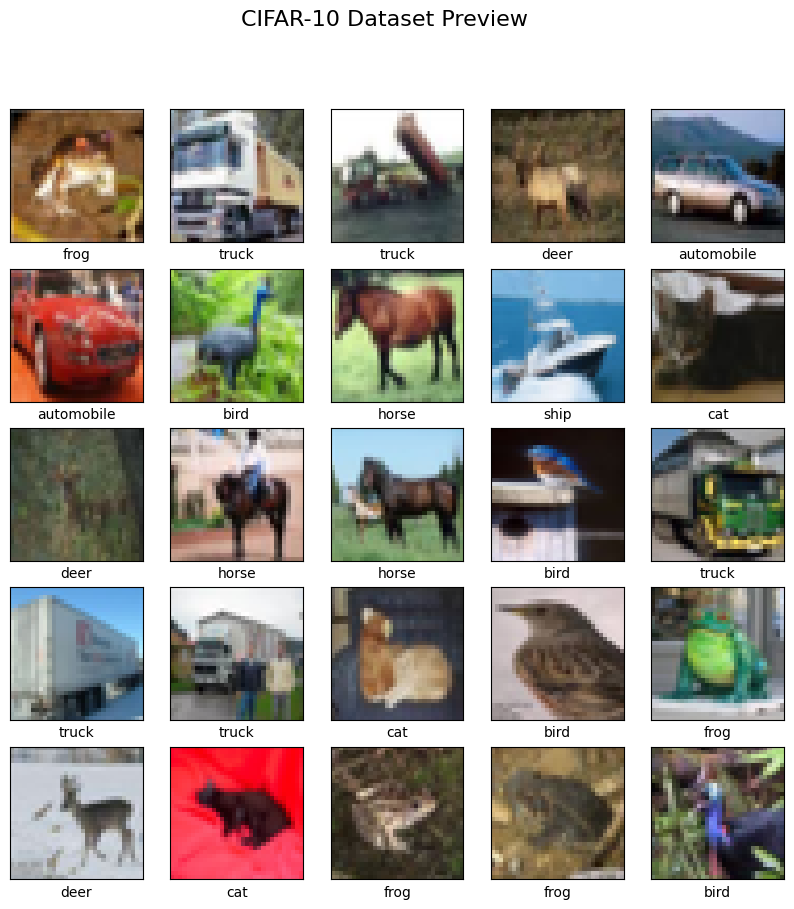

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Predicted class: dog


In [7]:
# --- Preprocess offline image ---
from pydoc import classname
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# CIFAR-10 class names
classes = [
    'airplane','automobile','bird','cat','deer',
    'dog','frog','horse','ship','truck'
]

# Plot 25 sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(classes[y_train[i][0]])
plt.suptitle("CIFAR-10 Dataset Preview", fontsize=16)
plt.show()

img_path = "your_image.jpg"   # update this

# --- Load and preprocess image ---
img = Image.open(img_path).convert("RGB")
img = img.resize((32, 32))

img_array = np.array(img) / 255.0     # normalize [0,1]
img_array = np.expand_dims(img_array, axis=0)  # add batch dim

# --- Inference ---
pred = model.predict(img_array)
class_id = np.argmax(pred)

print("Predicted class:", classes[class_id])

# **5: Performance Metrics (Accuracy, Confusion Matrix)**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.64      0.78      0.70      1000
           1       0.80      0.78      0.79      1000
           2       0.48      0.60      0.53      1000
           3       0.53      0.41      0.46      1000
           4       0.63      0.57      0.60      1000
           5       0.55      0.62      0.58      1000
           6       0.68      0.82      0.74      1000
           7       0.77      0.70      0.73      1000
           8       0.87      0.67      0.75      1000
           9       0.83      0.67      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.68      0.66      0.66     10000
weighted avg       0.68      0.66      0.66     10000



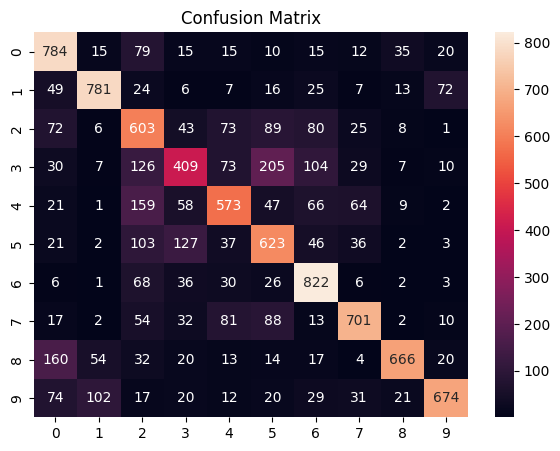

In [8]:

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(x_test), axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()


# **6: SSD Object Detection Code**

In [2]:
from pydoc import classname
import cv2

config_path = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
weights_path = "frozen_inference_graph.pb"
with open("Label.txt", "r") as f:
    class_names = f.read().strip().split("\n")

print(type(class_names))

net = cv2.dnn_DetectionModel(weights_path, config_path)
net.setInputSize(320,320)
net.setInputScale(1.0/127.5)
net.setInputMean((127.5,127.5,127.5))
net.setInputSwapRB(True)

print("SSD Model Loaded Successfully")

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Camera not working")
        break

    class_ids, confidences, boxes = net.detect(frame, 0.5)

    if len(class_ids) > 0:
        for class_id, conf, box in zip(class_ids.flatten(),
                                       confidences.flatten(),
                                       boxes):

            if class_id - 1 < len(class_names):
                label = class_names[class_id - 1]
            else:
                label = "Unknown"

            cv2.rectangle(frame, box, (0, 255, 0), 2)
            cv2.putText(frame,
                        f"{label} {conf:.2f}",
                        (box[0], box[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.6,
                        (0, 255, 0),
                        2)

    cv2.imshow("SSD MobileNet Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

<class 'list'>
SSD Model Loaded Successfully


# **7: Real‑Time Object Detection**

In [3]:
from ultralytics import YOLO
import cv2
import tkinter as tk

# ----------------------------
# Get screen resolution
# ----------------------------
root = tk.Tk()
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
root.destroy()

print(f"Screen Resolution: {screen_width}x{screen_height}")

# ----------------------------
# Load YOLO model
# ----------------------------
model = YOLO("yolov8n.pt")

# ----------------------------
# Start webcam
# ----------------------------
cap = cv2.VideoCapture(0)

# Force webcam to match screen resolution
cap.set(cv2.CAP_PROP_FRAME_WIDTH, screen_width)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, screen_height)

if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame!")
        break

    # ----------------------------
    # Run detection
    # ----------------------------
    results = model.predict(frame, conf=0.5)

    # ----------------------------
    # Draw bounding boxes
    # ----------------------------
    annotated = results[0].plot()

    # Auto-fit window to screen
    resized = cv2.resize(annotated, (screen_width, screen_height))

    cv2.imshow("YOLOv8 Auto-Screen Object Detection", resized)

    # Press Q to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Screen Resolution: 1536x864

0: 480x640 1 person, 192.6ms
Speed: 8.6ms preprocess, 192.6ms inference, 23.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 121.7ms
Speed: 4.3ms preprocess, 121.7ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 72.3ms
Speed: 3.0ms preprocess, 72.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 73.4ms
Speed: 2.7ms preprocess, 73.4ms inference, 20.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 79.5ms
Speed: 2.7ms preprocess, 79.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 75.0ms
Speed: 4.2ms preprocess, 75.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 83.6ms
Speed: 2.1ms preprocess, 83.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 77.8ms
Speed: 1.5ms preprocess, 77.8ms inference, 1.6ms

# **Chapter 8: Conclusion**
The CIFAR‑10 model was trained and evaluated, and SSD real‑time detection code was integrated.